In [167]:
from pyspark.sql import SparkSession
import mlflow

spark = (
    SparkSession.builder.config("spark.jars.packages", "org.mlflow:mlflow-spark:1.11.0")
    .master("local[*]")
    .getOrCreate()
)
# mlflow.set_tracking_uri("http://127.0.0.1:5000")
# mlflow.pyspark.ml.autolog()

spark

In [92]:
titanic_sdf = spark.read.csv('data/titanic_train.csv', header=True, inferSchema=True)
titanic_pdf = titanic_sdf.toPandas()
titanic_sdf.show(truncate=False)

+-----------+--------+------+-------------------------------------------------------+------+----+-----+-----+----------------+-------+-----+--------+
|PassengerId|Survived|Pclass|Name                                                   |Sex   |Age |SibSp|Parch|Ticket          |Fare   |Cabin|Embarked|
+-----------+--------+------+-------------------------------------------------------+------+----+-----+-----+----------------+-------+-----+--------+
|1          |0       |3     |Braund, Mr. Owen Harris                                |male  |22.0|1    |0    |A/5 21171       |7.25   |null |S       |
|2          |1       |1     |Cumings, Mrs. John Bradley (Florence Briggs Thayer)    |female|38.0|1    |0    |PC 17599        |71.2833|C85  |C       |
|3          |1       |3     |Heikkinen, Miss. Laina                                 |female|26.0|0    |0    |STON/O2. 3101282|7.925  |null |S       |
|4          |1       |1     |Futrelle, Mrs. Jacques Heath (Lily May Peel)           |female|35.0|1  

In [93]:
titanic_pdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int32  
 1   Survived     891 non-null    int32  
 2   Pclass       891 non-null    int32  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int32  
 7   Parch        891 non-null    int32  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int32(5), object(5)
memory usage: 66.3+ KB


In [94]:
titanic_sdf.printSchema()

root
 |-- PassengerId: integer (nullable = true)
 |-- Survived: integer (nullable = true)
 |-- Pclass: integer (nullable = true)
 |-- Name: string (nullable = true)
 |-- Sex: string (nullable = true)
 |-- Age: double (nullable = true)
 |-- SibSp: integer (nullable = true)
 |-- Parch: integer (nullable = true)
 |-- Ticket: string (nullable = true)
 |-- Fare: double (nullable = true)
 |-- Cabin: string (nullable = true)
 |-- Embarked: string (nullable = true)



In [95]:
import pyspark.sql.functions as F

titanic_sdf.select([F.count(F.when(F.col(c).isNull() | F.isnan(c), c)).alias(c) for c in titanic_sdf.columns]).show()

+-----------+--------+------+----+---+---+-----+-----+------+----+-----+--------+
|PassengerId|Survived|Pclass|Name|Sex|Age|SibSp|Parch|Ticket|Fare|Cabin|Embarked|
+-----------+--------+------+----+---+---+-----+-----+------+----+-----+--------+
|          0|       0|     0|   0|  0|177|    0|    0|     0|   0|  687|       2|
+-----------+--------+------+----+---+---+-----+-----+------+----+-----+--------+



In [96]:
titanic_sdf.describe().show(truncate=False)

+-------+-----------------+-------------------+------------------+------------------------------------------------+------+------------------+------------------+-------------------+------------------+-----------------+-----+--------+
|summary|PassengerId      |Survived           |Pclass            |Name                                            |Sex   |Age               |SibSp             |Parch              |Ticket            |Fare             |Cabin|Embarked|
+-------+-----------------+-------------------+------------------+------------------------------------------------+------+------------------+------------------+-------------------+------------------+-----------------+-----+--------+
|count  |891              |891                |891               |891                                             |891   |714               |891               |891                |891               |891              |204  |889     |
|mean   |446.0            |0.3838383838383838 |2.308641975308642 |nu

In [97]:
titanic_sdf.groupBy('Survived').count().show()

+--------+-----+
|Survived|count|
+--------+-----+
|       1|  342|
|       0|  549|
+--------+-----+



In [98]:
titanic_sdf.groupBy('Pclass').count().show()

+------+-----+
|Pclass|count|
+------+-----+
|     1|  216|
|     3|  491|
|     2|  184|
+------+-----+



In [99]:
groupby_cols = ['Survived', 'Pclass', 'Sex', 'Ticket', 'Cabin', 'Embarked']
for groupby_col in groupby_cols:
    titanic_sdf.groupBy(groupby_col).count().show()

+--------+-----+
|Survived|count|
+--------+-----+
|       1|  342|
|       0|  549|
+--------+-----+

+------+-----+
|Pclass|count|
+------+-----+
|     1|  216|
|     3|  491|
|     2|  184|
+------+-----+

+------+-----+
|   Sex|count|
+------+-----+
|female|  314|
|  male|  577|
+------+-----+

+----------------+-----+
|          Ticket|count|
+----------------+-----+
|          367230|    2|
|       P/PP 3381|    2|
|          244270|    1|
|          363291|    3|
|SOTON/OQ 3101317|    1|
|           31418|    1|
|           26360|    2|
|            2700|    1|
|           14313|    1|
|          345763|    1|
|       A/5 21172|    1|
|          364500|    1|
|           19877|    2|
|          350029|    1|
|          113800|    1|
|      A/4. 39886|    1|
|       C.A. 2673|    2|
|          113807|    1|
|        PC 17604|    2|
|       C.A. 2315|    2|
+----------------+-----+
only showing top 20 rows

+-------+-----+
|  Cabin|count|
+-------+-----+
|    A23|    1|
|    B79| 

<Axes: >

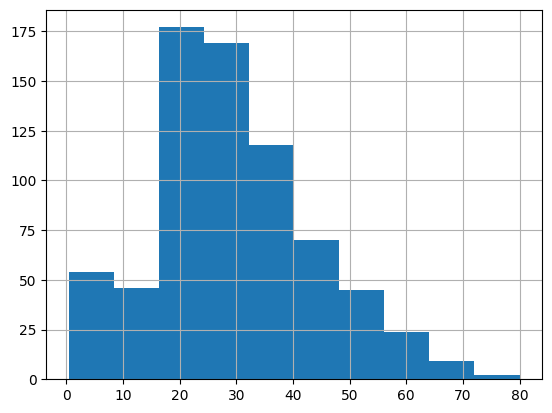

In [100]:
import matplotlib.pyplot as plt
import pandas as pd

titanic_pdf['Age'].hist()

In [101]:
import pyspark.pandas as ps

# from pandas dataframe: 
# psdf = ps.from_pandas(titanic_pdf) 
psdf = titanic_sdf.to_pandas_on_spark()
type(psdf)

/workspace/apache-spark-ml/.venv/lib/python3.8/site-packages/pyspark/sql/dataframe.py:5249: FutureWarning: DataFrame.to_pandas_on_spark is deprecated. Use DataFrame.pandas_api instead.
  warnings.warn(


pyspark.pandas.frame.DataFrame

In [102]:
print(pd.options.plotting.backend)
ps.options.plotting.backend = 'matplotlib'
print(ps.options.plotting.backend)

matplotlib
matplotlib


<Axes: ylabel='Frequency'>

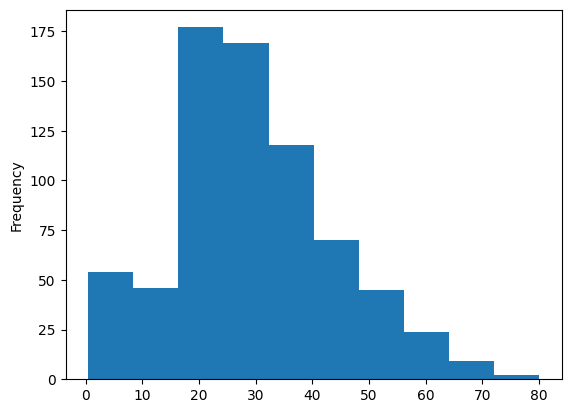

In [103]:
psdf['Age'].hist()

In [104]:
titanic_sdf.createOrReplaceTempView('titanic_view')

In [105]:
spark.sql('select t.survived, count(*) as cnt from titanic_view t group by t.survived order by 2 desc').show()

+--------+---+
|survived|cnt|
+--------+---+
|       0|549|
|       1|342|
+--------+---+



In [106]:
spark.sql('select t.cabin, count(*) as cnt from titanic_view t group by t.cabin order by 2 desc').show()

+-----------+---+
|      cabin|cnt|
+-----------+---+
|       null|687|
|         G6|  4|
|    B96 B98|  4|
|C23 C25 C27|  4|
|         F2|  3|
|    C22 C26|  3|
|          D|  3|
|       E101|  3|
|        F33|  3|
|        E33|  2|
|       C123|  2|
|        C83|  2|
|    B58 B60|  2|
|        D35|  2|
|        E44|  2|
|       C126|  2|
|      F G73|  2|
|        B18|  2|
|        D20|  2|
|       E121|  2|
+-----------+---+
only showing top 20 rows



In [107]:
spark.sql('select case when cabin is null then "NA" else cabin end as cabin from titanic_view').show()

+-----+
|cabin|
+-----+
|   NA|
|  C85|
|   NA|
| C123|
|   NA|
|   NA|
|  E46|
|   NA|
|   NA|
|   NA|
|   G6|
| C103|
|   NA|
|   NA|
|   NA|
|   NA|
|   NA|
|   NA|
|   NA|
|   NA|
+-----+
only showing top 20 rows



In [108]:
spark.sql('select age_bin, count(*) as cnt from(select floor(age/10.0) * 10 as age_bin from titanic_view) group by age_bin order by 2 desc').show()

+-------+---+
|age_bin|cnt|
+-------+---+
|     20|220|
|   null|177|
|     30|167|
|     10|102|
|     40| 89|
|      0| 62|
|     50| 48|
|     60| 19|
|     70|  6|
|     80|  1|
+-------+---+



In [109]:
spark.sql('''
select age_bin || "-" || (age_bin + 10) as age_bin_range, cnt 
from (
    select floor(age/10.0) * 10 as age_bin, count(*) as cnt 
    from titanic_view group by 1
) order by cnt desc
''').show()

+-------------+---+
|age_bin_range|cnt|
+-------------+---+
|        20-30|220|
|         null|177|
|        30-40|167|
|        10-20|102|
|        40-50| 89|
|         0-10| 62|
|        50-60| 48|
|        60-70| 19|
|        70-80|  6|
|        80-90|  1|
+-------------+---+



In [110]:
spark.sql('''
select fare_bin || "-" || (fare_bin + 10) as fare_bin_range, cnt 
from (
    select floor(fare/10.0) * 10 as fare_bin, count(*) as cnt 
    from titanic_view group by 1
) order by cnt desc
''').show()

+--------------+---+
|fare_bin_range|cnt|
+--------------+---+
|          0-10|336|
|         10-20|179|
|         20-30|136|
|         30-40| 64|
|         50-60| 39|
|         70-80| 29|
|         60-70| 17|
|         80-90| 15|
|         40-50| 15|
|        90-100|  8|
|       130-140|  7|
|       110-120|  7|
|       150-160|  7|
|       260-270|  6|
|       220-230|  5|
|       120-130|  4|
|       100-110|  4|
|       210-220|  4|
|       510-520|  3|
|       160-170|  2|
+--------------+---+
only showing top 20 rows



In [111]:
titanic_sdf.groupBy('Survived', 'Sex').count().show()

+--------+------+-----+
|Survived|   Sex|count|
+--------+------+-----+
|       0|female|   81|
|       1|  male|  109|
|       1|female|  233|
|       0|  male|  468|
+--------+------+-----+



In [112]:
spark.sql('''
    select Survived, Sex, count(*) as count 
    from titanic_view 
    group by Survived, Sex
''').show()

+--------+------+-----+
|Survived|   Sex|count|
+--------+------+-----+
|       0|female|   81|
|       1|  male|  109|
|       1|female|  233|
|       0|  male|  468|
+--------+------+-----+



In [113]:
spark.sql('''
    select pclass, sex, survived, count(*) cnt
    from titanic_view 
    group by pclass, sex, survived
    order by 1, 2, 3
''').show()

+------+------+--------+---+
|pclass|   sex|survived|cnt|
+------+------+--------+---+
|     1|female|       0|  3|
|     1|female|       1| 91|
|     1|  male|       0| 77|
|     1|  male|       1| 45|
|     2|female|       0|  6|
|     2|female|       1| 70|
|     2|  male|       0| 91|
|     2|  male|       1| 17|
|     3|female|       0| 72|
|     3|female|       1| 72|
|     3|  male|       0|300|
|     3|  male|       1| 47|
+------+------+--------+---+



In [114]:
spark.sql('''
    select pclass, sex,
    count(case when survived = 0 then 1 else Null end) cnt_non_survived,
    count(case when survived = 1 then 1 else Null end) cnt_survived
    from titanic_view 
    group by pclass, sex
    order by 1, 2
''').show()

+------+------+----------------+------------+
|pclass|   sex|cnt_non_survived|cnt_survived|
+------+------+----------------+------------+
|     1|female|               3|          91|
|     1|  male|              77|          45|
|     2|female|               6|          70|
|     2|  male|              91|          17|
|     3|female|              72|          72|
|     3|  male|             300|          47|
+------+------+----------------+------------+



In [115]:
spark.sql('''
    select pclass, sex,
    sum(case when survived = 0 then 1 else 0 end) cnt_non_survived,
    sum(case when survived = 1 then 1 else 0 end) cnt_survived
    from titanic_view 
    group by pclass, sex
    order by 1, 2
''').show()

+------+------+----------------+------------+
|pclass|   sex|cnt_non_survived|cnt_survived|
+------+------+----------------+------------+
|     1|female|               3|          91|
|     1|  male|              77|          45|
|     2|female|               6|          70|
|     2|  male|              91|          17|
|     3|female|              72|          72|
|     3|  male|             300|          47|
+------+------+----------------+------------+



In [134]:
def get_category(age):
    if age == None: return 'NA'
    if age <= 5: return 'Baby'
    if age <= 12: return 'Child'
    if age <= 18: return 'Teenager'
    if age <= 25: return 'Student'
    if age <= 35: return 'Young Adult'
    if age <= 60: return 'Adult'
    return 'Elderly'

In [117]:
import pyspark.sql.functions as F
# from pyspark.sql.types import StringType

udf_get_category = F.udf(get_category) # F.udf(get_category, StringType())

titanic_sdf = titanic_sdf.withColumn('Age_Category', udf_get_category(F.col('Age')))
titanic_sdf.show(truncate=False)

+-----------+--------+------+-------------------------------------------------------+------+----+-----+-----+----------------+-------+-----+--------+------------+
|PassengerId|Survived|Pclass|Name                                                   |Sex   |Age |SibSp|Parch|Ticket          |Fare   |Cabin|Embarked|Age_Category|
+-----------+--------+------+-------------------------------------------------------+------+----+-----+-----+----------------+-------+-----+--------+------------+
|1          |0       |3     |Braund, Mr. Owen Harris                                |male  |22.0|1    |0    |A/5 21171       |7.25   |null |S       |Student     |
|2          |1       |1     |Cumings, Mrs. John Bradley (Florence Briggs Thayer)    |female|38.0|1    |0    |PC 17599        |71.2833|C85  |C       |Adult       |
|3          |1       |3     |Heikkinen, Miss. Laina                                 |female|26.0|0    |0    |STON/O2. 3101282|7.925  |null |S       |Young Adult |
|4          |1       |

In [118]:
titanic_sdf_filled = titanic_sdf.withColumn(
    'Age_category',
    F.when(F.col('Age').isNull() | F.isnan(F.col('Age')), 'NA') \
    .when(F.col('Age') <= 5, 'Baby')
    .when(F.col('Age') <= 12, 'Child')
    .when(F.col('Age') <= 18, 'Teenager')
    .when(F.col('Age') <= 25, 'Student')
    .when(F.col('Age') <= 35, 'Young Adult')
    .when(F.col('Age') <= 60, 'Adult')
    .otherwise('Elderly')
)
titanic_sdf_filled.show()

+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+------------+
|PassengerId|Survived|Pclass|                Name|   Sex| Age|SibSp|Parch|          Ticket|   Fare|Cabin|Embarked|Age_category|
+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+------------+
|          1|       0|     3|Braund, Mr. Owen ...|  male|22.0|    1|    0|       A/5 21171|   7.25| null|       S|     Student|
|          2|       1|     1|Cumings, Mrs. Joh...|female|38.0|    1|    0|        PC 17599|71.2833|  C85|       C|       Adult|
|          3|       1|     3|Heikkinen, Miss. ...|female|26.0|    0|    0|STON/O2. 3101282|  7.925| null|       S| Young Adult|
|          4|       1|     1|Futrelle, Mrs. Ja...|female|35.0|    1|    0|          113803|   53.1| C123|       S| Young Adult|
|          5|       0|     3|Allen, Mr. Willia...|  male|35.0|    0|    0|          373450|   8.05| null

In [119]:
# added columns cannot be reflected in view
spark.sql('select * from titanic_view').show()

+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
|PassengerId|Survived|Pclass|                Name|   Sex| Age|SibSp|Parch|          Ticket|   Fare|Cabin|Embarked|
+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
|          1|       0|     3|Braund, Mr. Owen ...|  male|22.0|    1|    0|       A/5 21171|   7.25| null|       S|
|          2|       1|     1|Cumings, Mrs. Joh...|female|38.0|    1|    0|        PC 17599|71.2833|  C85|       C|
|          3|       1|     3|Heikkinen, Miss. ...|female|26.0|    0|    0|STON/O2. 3101282|  7.925| null|       S|
|          4|       1|     1|Futrelle, Mrs. Ja...|female|35.0|    1|    0|          113803|   53.1| C123|       S|
|          5|       0|     3|Allen, Mr. Willia...|  male|35.0|    0|    0|          373450|   8.05| null|       S|
|          6|       0|     3|    Moran, Mr. James|  male|null|    0|    0|      

In [120]:
titanic_sdf.createOrReplaceTempView('titanic_view')

In [121]:
spark.sql('select * from titanic_view').show()

+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+------------+
|PassengerId|Survived|Pclass|                Name|   Sex| Age|SibSp|Parch|          Ticket|   Fare|Cabin|Embarked|Age_Category|
+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+------------+
|          1|       0|     3|Braund, Mr. Owen ...|  male|22.0|    1|    0|       A/5 21171|   7.25| null|       S|     Student|
|          2|       1|     1|Cumings, Mrs. Joh...|female|38.0|    1|    0|        PC 17599|71.2833|  C85|       C|       Adult|
|          3|       1|     3|Heikkinen, Miss. ...|female|26.0|    0|    0|STON/O2. 3101282|  7.925| null|       S| Young Adult|
|          4|       1|     1|Futrelle, Mrs. Ja...|female|35.0|    1|    0|          113803|   53.1| C123|       S| Young Adult|
|          5|       0|     3|Allen, Mr. Willia...|  male|35.0|    0|    0|          373450|   8.05| null

In [122]:
spark.sql('''
    select age_category, survived, sex, count(*) cnt
    from titanic_view
    group by age_category, survived, sex
    order by cnt desc
''').show()

+------------+--------+------+---+
|age_category|survived|   sex|cnt|
+------------+--------+------+---+
|          NA|       0|  male|108|
|       Adult|       0|  male|101|
| Young Adult|       0|  male|100|
|     Student|       0|  male| 95|
|       Adult|       1|female| 54|
| Young Adult|       1|female| 53|
|     Student|       1|female| 41|
|          NA|       1|female| 36|
|    Teenager|       0|  male| 31|
| Young Adult|       1|  male| 30|
|    Teenager|       1|female| 27|
|       Adult|       1|  male| 24|
|     Elderly|       0|  male| 17|
|          NA|       0|female| 17|
|          NA|       1|  male| 16|
|        Baby|       1|female| 16|
|       Adult|       0|female| 16|
|        Baby|       1|  male| 15|
|     Student|       1|  male| 13|
|     Student|       0|female| 13|
+------------+--------+------+---+
only showing top 20 rows



In [123]:
avg_age = titanic_sdf.select(F.avg(F.col('Age')))
avg_age.show()
avg_age_row = avg_age.first() # = avg_age.head()
avg_age_val = avg_age_row[0]

avg_age, avg_age_row, avg_age_val

+-----------------+
|         avg(Age)|
+-----------------+
|29.69911764705882|
+-----------------+



(DataFrame[avg(Age): double],
 Row(avg(Age)=29.69911764705882),
 29.69911764705882)

In [124]:
titanic_sdf = titanic_sdf.fillna({
    'Age': titanic_sdf.select(F.avg(F.col('Age'))).first()[0],
    'Cabin': 'N',
    'Embarked': 'N'
})
titanic_sdf.show()

+-----------+--------+------+--------------------+------+-----------------+-----+-----+----------------+-------+-----+--------+------------+
|PassengerId|Survived|Pclass|                Name|   Sex|              Age|SibSp|Parch|          Ticket|   Fare|Cabin|Embarked|Age_Category|
+-----------+--------+------+--------------------+------+-----------------+-----+-----+----------------+-------+-----+--------+------------+
|          1|       0|     3|Braund, Mr. Owen ...|  male|             22.0|    1|    0|       A/5 21171|   7.25|    N|       S|     Student|
|          2|       1|     1|Cumings, Mrs. Joh...|female|             38.0|    1|    0|        PC 17599|71.2833|  C85|       C|       Adult|
|          3|       1|     3|Heikkinen, Miss. ...|female|             26.0|    0|    0|STON/O2. 3101282|  7.925|    N|       S| Young Adult|
|          4|       1|     1|Futrelle, Mrs. Ja...|female|             35.0|    1|    0|          113803|   53.1| C123|       S| Young Adult|
|          5|

In [125]:
titanic_sdf = titanic_sdf.withColumn('Age_Category', udf_get_category(F.col('Age')))
titanic_sdf.groupBy('age_category', 'survived', 'sex').count().show(truncate=False)

+------------+--------+------+-----+
|age_category|survived|sex   |count|
+------------+--------+------+-----+
|Elderly     |1       |female|3    |
|Student     |1       |female|41   |
|Teenager    |0       |male  |31   |
|Teenager    |0       |female|9    |
|Student     |1       |male  |13   |
|Baby        |0       |female|5    |
|Child       |0       |female|8    |
|Student     |0       |female|13   |
|Young Adult |0       |female|30   |
|Elderly     |0       |male  |17   |
|Teenager    |1       |female|27   |
|Child       |1       |male  |6    |
|Baby        |1       |male  |15   |
|Young Adult |1       |male  |46   |
|Baby        |0       |male  |8    |
|Adult       |1       |female|54   |
|Adult       |0       |male  |101  |
|Student     |0       |male  |95   |
|Child       |1       |female|3    |
|Adult       |1       |male  |24   |
+------------+--------+------+-----+
only showing top 20 rows



In [126]:
titanic_sdf = titanic_sdf.withColumn('Cabin', F.col('Cabin').substr(0, 1))
titanic_sdf.show()

+-----------+--------+------+--------------------+------+-----------------+-----+-----+----------------+-------+-----+--------+------------+
|PassengerId|Survived|Pclass|                Name|   Sex|              Age|SibSp|Parch|          Ticket|   Fare|Cabin|Embarked|Age_Category|
+-----------+--------+------+--------------------+------+-----------------+-----+-----+----------------+-------+-----+--------+------------+
|          1|       0|     3|Braund, Mr. Owen ...|  male|             22.0|    1|    0|       A/5 21171|   7.25|    N|       S|     Student|
|          2|       1|     1|Cumings, Mrs. Joh...|female|             38.0|    1|    0|        PC 17599|71.2833|    C|       C|       Adult|
|          3|       1|     3|Heikkinen, Miss. ...|female|             26.0|    0|    0|STON/O2. 3101282|  7.925|    N|       S| Young Adult|
|          4|       1|     1|Futrelle, Mrs. Ja...|female|             35.0|    1|    0|          113803|   53.1|    C|       S| Young Adult|
|          5|

In [127]:
def fill_n_transform_columns(titanic_sdf):
    titanic_sdf = titanic_sdf.fillna({
        'Age': titanic_sdf.select(F.avg('Age')).first()[0],
        'Cabin': 'N',
        'Embarked': 'N'
    })
    titanic_sdf = titanic_sdf.withColumn('Age_Category', udf_get_category(F.col('Age')))
    titanic_sdf = titanic_sdf.withColumn('Cabin', F.col('Cabin').substr(0, 1))
    return titanic_sdf

In [128]:
titanic_sdf = fill_n_transform_columns(titanic_sdf)
titanic_sdf.show(truncate=False)

+-----------+--------+------+-------------------------------------------------------+------+-----------------+-----+-----+----------------+-------+-----+--------+------------+
|PassengerId|Survived|Pclass|Name                                                   |Sex   |Age              |SibSp|Parch|Ticket          |Fare   |Cabin|Embarked|Age_Category|
+-----------+--------+------+-------------------------------------------------------+------+-----------------+-----+-----+----------------+-------+-----+--------+------------+
|1          |0       |3     |Braund, Mr. Owen Harris                                |male  |22.0             |1    |0    |A/5 21171       |7.25   |N    |S       |Student     |
|2          |1       |1     |Cumings, Mrs. John Bradley (Florence Briggs Thayer)    |female|38.0             |1    |0    |PC 17599        |71.2833|C    |C       |Adult       |
|3          |1       |3     |Heikkinen, Miss. Laina                                 |female|26.0             |0    |0   

In [129]:
titanic_sdf.select([F.count(F.when(F.col(c).isNull() | F.isnan(F.col(c)), c)).alias(c) for c in titanic_sdf.columns]).show(truncate=False)

+-----------+--------+------+----+---+---+-----+-----+------+----+-----+--------+------------+
|PassengerId|Survived|Pclass|Name|Sex|Age|SibSp|Parch|Ticket|Fare|Cabin|Embarked|Age_Category|
+-----------+--------+------+----+---+---+-----+-----+------+----+-----+--------+------------+
|0          |0       |0     |0   |0  |0  |0    |0    |0     |0   |0    |0       |0           |
+-----------+--------+------+----+---+---+-----+-----+------+----+-----+--------+------------+



In [130]:
def drop_columns(sdf, drop_cols=None):
    sdf = sdf.drop(*drop_cols)
    return sdf

In [131]:
titanic_sdf = drop_columns(titanic_sdf, drop_cols=['PassengerId', 'Name', 'Ticket'])
titanic_sdf.show(truncate=False)

+--------+------+------+-----------------+-----+-----+-------+-----+--------+------------+
|Survived|Pclass|Sex   |Age              |SibSp|Parch|Fare   |Cabin|Embarked|Age_Category|
+--------+------+------+-----------------+-----+-----+-------+-----+--------+------------+
|0       |3     |male  |22.0             |1    |0    |7.25   |N    |S       |Student     |
|1       |1     |female|38.0             |1    |0    |71.2833|C    |C       |Adult       |
|1       |3     |female|26.0             |0    |0    |7.925  |N    |S       |Young Adult |
|1       |1     |female|35.0             |1    |0    |53.1   |C    |S       |Young Adult |
|0       |3     |male  |35.0             |0    |0    |8.05   |N    |S       |Young Adult |
|0       |3     |male  |29.69911764705882|0    |0    |8.4583 |N    |Q       |Young Adult |
|0       |1     |male  |54.0             |0    |0    |51.8625|E    |S       |Adult       |
|0       |3     |male  |2.0              |3    |1    |21.075 |N    |S       |Baby        |

In [152]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder
from pyspark.ml import Pipeline

def encode_columns(sdf, input_cols=None, encode='label'):
    label_cols = [f'label_{col}' for col in input_cols]
    onehot_cols = [f'onehot_{col}' for col in input_cols]

    string_indexer = StringIndexer(inputCols=input_cols, outputCols=label_cols)
    onehot_encoder = OneHotEncoder(inputCols=label_cols, outputCols=onehot_cols)

    pipeline = Pipeline(stages=[string_indexer] if encode == 'label' else [string_indexer, onehot_encoder])
    sdf = pipeline.fit(sdf).transform(sdf)
    return sdf

In [133]:
titanic_sdf_encoded = encode_columns(titanic_sdf.select('*'), input_cols=['Age_Category', 'Cabin', 'Sex', 'Embarked'], encode='onehot')
titanic_sdf_encoded.show()

2023/06/06 06:30:36 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'edef063cd6c64735aaf49a9a10d54478', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current pyspark.ml workflow
23/06/06 06:30:36 WARN StringIndexerModel: Input column Sex does not exist during transformation. Skip StringIndexerModel for this column.
23/06/06 06:30:37 WARN StringIndexerModel: Input column Cabin does not exist during transformation. Skip StringIndexerModel for this column.
23/06/06 06:30:37 WARN StringIndexerModel: Input column Embarked does not exist during transformation. Skip StringIndexerModel for this column.
23/06/06 06:30:37 WARN StringIndexerModel: Input column Age_Category does not exist during transformation. Skip StringIndexerModel for this column.
2023/06/06 06:30:37 WARNING mlflow.pyspark.ml: Model outputs contain unsupported Spark data types: [StructField('onehot_Age_Category', VectorUDT(), True), StructFie

+--------+------+------+-----------------+-----+-----+-------+-----+--------+------------+------------------+-----------+---------+--------------+-------------------+-------------+-------------+---------------+
|Survived|Pclass|   Sex|              Age|SibSp|Parch|   Fare|Cabin|Embarked|Age_Category|label_Age_Category|label_Cabin|label_Sex|label_Embarked|onehot_Age_Category| onehot_Cabin|   onehot_Sex|onehot_Embarked|
+--------+------+------+-----------------+-----+-----+-------+-----+--------+------------+------------------+-----------+---------+--------------+-------------------+-------------+-------------+---------------+
|       0|     3|  male|             22.0|    1|    0|   7.25|    N|       S|     Student|               2.0|        0.0|      0.0|           0.0|      (6,[2],[1.0])|(8,[0],[1.0])|(1,[0],[1.0])|  (3,[0],[1.0])|
|       1|     1|female|             38.0|    1|    0|71.2833|    C|       C|       Adult|               1.0|        1.0|      1.0|           1.0|      (6,[

In [160]:
titanic_sdf = spark.read.csv('data/titanic_train.csv', header=True, inferSchema=True)
titanic_sdf.show()

+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
|PassengerId|Survived|Pclass|                Name|   Sex| Age|SibSp|Parch|          Ticket|   Fare|Cabin|Embarked|
+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
|          1|       0|     3|Braund, Mr. Owen ...|  male|22.0|    1|    0|       A/5 21171|   7.25| null|       S|
|          2|       1|     1|Cumings, Mrs. Joh...|female|38.0|    1|    0|        PC 17599|71.2833|  C85|       C|
|          3|       1|     3|Heikkinen, Miss. ...|female|26.0|    0|    0|STON/O2. 3101282|  7.925| null|       S|
|          4|       1|     1|Futrelle, Mrs. Ja...|female|35.0|    1|    0|          113803|   53.1| C123|       S|
|          5|       0|     3|Allen, Mr. Willia...|  male|35.0|    0|    0|          373450|   8.05| null|       S|
|          6|       0|     3|    Moran, Mr. James|  male|null|    0|    0|      

In [161]:
titanic_sdf = fill_n_transform_columns(titanic_sdf)
titanic_sdf = encode_columns(titanic_sdf, input_cols=['Age_Category', 'Cabin', 'Sex', 'Embarked'])
titanic_sdf.printSchema()

2023/06/06 07:45:52 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'b255daf06c584103862d4710444968b1', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current pyspark.ml workflow
23/06/06 07:45:53 WARN StringIndexerModel: Input column Sex does not exist during transformation. Skip StringIndexerModel for this column.
23/06/06 07:45:53 WARN StringIndexerModel: Input column Cabin does not exist during transformation. Skip StringIndexerModel for this column.
23/06/06 07:45:53 WARN StringIndexerModel: Input column Embarked does not exist during transformation. Skip StringIndexerModel for this column.
23/06/06 07:45:53 WARN StringIndexerModel: Input column Age_Category does not exist during transformation. Skip StringIndexerModel for this column.
2023/06/06 07:45:53 WARNING mlflow.pyspark.ml: Failed to infer model signature: list index out of range
23/06/06 07:45:53 ERROR Instrumentation: org.apache.hadoop.f

root
 |-- PassengerId: integer (nullable = true)
 |-- Survived: integer (nullable = true)
 |-- Pclass: integer (nullable = true)
 |-- Name: string (nullable = true)
 |-- Sex: string (nullable = true)
 |-- Age: double (nullable = false)
 |-- SibSp: integer (nullable = true)
 |-- Parch: integer (nullable = true)
 |-- Ticket: string (nullable = true)
 |-- Fare: double (nullable = true)
 |-- Cabin: string (nullable = false)
 |-- Embarked: string (nullable = false)
 |-- Age_Category: string (nullable = true)
 |-- label_Age_Category: double (nullable = false)
 |-- label_Cabin: double (nullable = false)
 |-- label_Sex: double (nullable = false)
 |-- label_Embarked: double (nullable = false)



In [162]:
titanic_sdf.select([F.count(F.when(F.col(c).isNull() | F.isnan(c), c)).alias(c) for c in titanic_sdf.columns]).show()
titanic_sdf.show()

+-----------+--------+------+----+---+---+-----+-----+------+----+-----+--------+------------+------------------+-----------+---------+--------------+
|PassengerId|Survived|Pclass|Name|Sex|Age|SibSp|Parch|Ticket|Fare|Cabin|Embarked|Age_Category|label_Age_Category|label_Cabin|label_Sex|label_Embarked|
+-----------+--------+------+----+---+---+-----+-----+------+----+-----+--------+------------+------------------+-----------+---------+--------------+
|          0|       0|     0|   0|  0|  0|    0|    0|     0|   0|    0|       0|           0|                 0|          0|        0|             0|
+-----------+--------+------+----+---+---+-----+-----+------+----+-----+--------+------------+------------------+-----------+---------+--------------+

+-----------+--------+------+--------------------+------+-----------------+-----+-----+----------------+-------+-----+--------+------------+------------------+-----------+---------+--------------+
|PassengerId|Survived|Pclass|                Na

In [163]:
drop_columns = [col_name for col_name, col_type in titanic_sdf.dtypes if col_type == 'string']
drop_columns += ['Survived', 'PassengerId']

vector_columns = [col for col in titanic_sdf.columns if col not in drop_columns]
vector_columns

['Pclass',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'label_Age_Category',
 'label_Cabin',
 'label_Sex',
 'label_Embarked']

In [164]:
from pyspark.ml.feature import VectorAssembler

vector_assembler = VectorAssembler(inputCols=vector_columns, outputCol='features')
titanic_sdf = vector_assembler.transform(titanic_sdf)

train_sdf, test_sdf = titanic_sdf.randomSplit([0.8, 0.2], seed=11)
train_sdf.show()

+-----------+--------+------+--------------------+------+-----------------+-----+-----+----------------+-------+-----+--------+------------+------------------+-----------+---------+--------------+--------------------+
|PassengerId|Survived|Pclass|                Name|   Sex|              Age|SibSp|Parch|          Ticket|   Fare|Cabin|Embarked|Age_Category|label_Age_Category|label_Cabin|label_Sex|label_Embarked|            features|
+-----------+--------+------+--------------------+------+-----------------+-----+-----+----------------+-------+-----+--------+------------+------------------+-----------+---------+--------------+--------------------+
|          1|       0|     3|Braund, Mr. Owen ...|  male|             22.0|    1|    0|       A/5 21171|   7.25|    N|       S|     Student|               2.0|        0.0|      0.0|           0.0|[3.0,22.0,1.0,0.0...|
|          2|       1|     1|Cumings, Mrs. Joh...|female|             38.0|    1|    0|        PC 17599|71.2833|    C|       C| 

In [168]:
from pyspark.ml.classification import DecisionTreeClassifier

dt_estimator = DecisionTreeClassifier(featuresCol='features', labelCol='Survived')
dt_model = dt_estimator.fit(train_sdf)
predictions = dt_model.transform(test_sdf)
predictions.show()

2023/06/06 07:49:27 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '9916c69fe5ec416ab4fa0af630fc8dc5', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current pyspark.ml workflow
23/06/06 07:49:28 ERROR Instrumentation: org.apache.hadoop.fs.UnsupportedFileSystemException: No FileSystem for scheme "mlflow-artifacts"
	at org.apache.hadoop.fs.FileSystem.getFileSystemClass(FileSystem.java:3443)
	at org.apache.hadoop.fs.FileSystem.createFileSystem(FileSystem.java:3466)
	at org.apache.hadoop.fs.FileSystem.access$300(FileSystem.java:174)
	at org.apache.hadoop.fs.FileSystem$Cache.getInternal(FileSystem.java:3574)
	at org.apache.hadoop.fs.FileSystem$Cache.get(FileSystem.java:3521)
	at org.apache.hadoop.fs.FileSystem.get(FileSystem.java:540)
	at org.apache.hadoop.fs.Path.getFileSystem(Path.java:365)
	at org.apache.spark.ml.util.FileSystemOverwrite.handleOverwrite(ReadWrite.scala:673)
	at org.apache.spark.ml.util

+-----------+--------+------+--------------------+------+-----------------+-----+-----+----------+-------+-----+--------+------------+------------------+-----------+---------+--------------+--------------------+-------------+--------------------+----------+
|PassengerId|Survived|Pclass|                Name|   Sex|              Age|SibSp|Parch|    Ticket|   Fare|Cabin|Embarked|Age_Category|label_Age_Category|label_Cabin|label_Sex|label_Embarked|            features|rawPrediction|         probability|prediction|
+-----------+--------+------+--------------------+------+-----------------+-----+-----+----------+-------+-----+--------+------------+------------------+-----------+---------+--------------+--------------------+-------------+--------------------+----------+
|          6|       0|     3|    Moran, Mr. James|  male|29.69911764705882|    0|    0|    330877| 8.4583|    N|       Q| Young Adult|               0.0|        0.0|      0.0|           2.0|(9,[0,1,4,8],[3.0...| [302.0,37.0]|[

In [170]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

accuracy_evaluator = MulticlassClassificationEvaluator(labelCol='Survived', metricName='accuracy')
accuracy_evaluator.evaluate(predictions)

0.8297872340425532

In [174]:
dt_estimator.__class__.__name__

'DecisionTreeClassifier'

In [175]:
def train_test_eval(estimator, train_sdf, test_sdf, evaluator):
    estimator_model = estimator.fit(train_sdf)
    predictions = estimator_model.transform(test_sdf)
    accuracy = evaluator.evaluate(predictions)
    print(estimator.__class__.__name__, 'accuracy:', accuracy)

In [176]:
titanic_sdf = train_sdf.drop('features')

In [177]:
vector_assembler = VectorAssembler(inputCols=vector_columns, outputCol='features')
titanic_sdf = vector_assembler.transform(titanic_sdf)
train_sdf, test_sdf = titanic_sdf.randomSplit([.8, .2], seed=11)
dt_estimator = DecisionTreeClassifier(featuresCol='features', labelCol='Survived')
accuracy_evaluator = MulticlassClassificationEvaluator(labelCol='Survived', metricName='accuracy')

In [178]:
train_test_eval(dt_estimator, train_sdf, test_sdf, accuracy_evaluator)

2023/06/06 07:59:11 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '4464274a46ca42fa8cf02b9f0e669f1b', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current pyspark.ml workflow
23/06/06 07:59:12 ERROR Instrumentation: org.apache.hadoop.fs.UnsupportedFileSystemException: No FileSystem for scheme "mlflow-artifacts"
	at org.apache.hadoop.fs.FileSystem.getFileSystemClass(FileSystem.java:3443)
	at org.apache.hadoop.fs.FileSystem.createFileSystem(FileSystem.java:3466)
	at org.apache.hadoop.fs.FileSystem.access$300(FileSystem.java:174)
	at org.apache.hadoop.fs.FileSystem$Cache.getInternal(FileSystem.java:3574)
	at org.apache.hadoop.fs.FileSystem$Cache.get(FileSystem.java:3521)
	at org.apache.hadoop.fs.FileSystem.get(FileSystem.java:540)
	at org.apache.hadoop.fs.Path.getFileSystem(Path.java:365)
	at org.apache.spark.ml.util.FileSystemOverwrite.handleOverwrite(ReadWrite.scala:673)
	at org.apache.spark.ml.util

DecisionTreeClassifier accuracy: 0.8590604026845637


In [179]:
from pyspark.ml.classification import LogisticRegression, RandomForestClassifier

label_col = 'Survived'
estimators = [
    DecisionTreeClassifier(labelCol=label_col),
    LogisticRegression(labelCol=label_col),
    RandomForestClassifier(labelCol=label_col),
]

for estimator in estimators:
    train_test_eval(estimator, train_sdf, test_sdf, accuracy_evaluator)

2023/06/06 08:01:28 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'faf7e4a84996457c97f96d89c7b20878', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current pyspark.ml workflow
23/06/06 08:01:30 ERROR Instrumentation: org.apache.hadoop.fs.UnsupportedFileSystemException: No FileSystem for scheme "mlflow-artifacts"
	at org.apache.hadoop.fs.FileSystem.getFileSystemClass(FileSystem.java:3443)
	at org.apache.hadoop.fs.FileSystem.createFileSystem(FileSystem.java:3466)
	at org.apache.hadoop.fs.FileSystem.access$300(FileSystem.java:174)
	at org.apache.hadoop.fs.FileSystem$Cache.getInternal(FileSystem.java:3574)
	at org.apache.hadoop.fs.FileSystem$Cache.get(FileSystem.java:3521)
	at org.apache.hadoop.fs.FileSystem.get(FileSystem.java:540)
	at org.apache.hadoop.fs.Path.getFileSystem(Path.java:365)
	at org.apache.spark.ml.util.FileSystemOverwrite.handleOverwrite(ReadWrite.scala:673)
	at org.apache.spark.ml.util

DecisionTreeClassifier accuracy: 0.8590604026845637


2023/06/06 08:01:48 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'c9d0e60a4c2a484088bbfa6f10dc8ff7', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current pyspark.ml workflow
23/06/06 08:01:50 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS
23/06/06 08:01:51 ERROR Instrumentation: org.apache.hadoop.fs.UnsupportedFileSystemException: No FileSystem for scheme "mlflow-artifacts"
	at org.apache.hadoop.fs.FileSystem.getFileSystemClass(FileSystem.java:3443)
	at org.apache.hadoop.fs.FileSystem.createFileSystem(FileSystem.java:3466)
	at org.apache.hadoop.fs.FileSystem.access$300(FileSystem.java:174)
	at org.apache.hadoop.fs.FileSystem$Cache.getInternal(FileSystem.java:3574)
	at org.apache.hadoop.fs.FileSystem$Cache.get(FileSystem.java:3521)
	at org.apache.hadoop.fs.FileSystem.get(FileSystem.java:540)
	at org.apache.hadoop.fs.Path.getFileSystem(Path.java:365)
	at org

LogisticRegression accuracy: 0.8120805369127517


23/06/06 08:02:12 ERROR Instrumentation: org.apache.hadoop.fs.UnsupportedFileSystemException: No FileSystem for scheme "mlflow-artifacts"
	at org.apache.hadoop.fs.FileSystem.getFileSystemClass(FileSystem.java:3443)
	at org.apache.hadoop.fs.FileSystem.createFileSystem(FileSystem.java:3466)
	at org.apache.hadoop.fs.FileSystem.access$300(FileSystem.java:174)
	at org.apache.hadoop.fs.FileSystem$Cache.getInternal(FileSystem.java:3574)
	at org.apache.hadoop.fs.FileSystem$Cache.get(FileSystem.java:3521)
	at org.apache.hadoop.fs.FileSystem.get(FileSystem.java:540)
	at org.apache.hadoop.fs.Path.getFileSystem(Path.java:365)
	at org.apache.spark.ml.util.FileSystemOverwrite.handleOverwrite(ReadWrite.scala:673)
	at org.apache.spark.ml.util.MLWriter.save(ReadWrite.scala:167)
	at org.apache.spark.ml.PipelineModel$PipelineModelWriter.super$save(Pipeline.scala:344)
	at org.apache.spark.ml.PipelineModel$PipelineModelWriter.$anonfun$save$4(Pipeline.scala:344)
	at org.apache.spark.ml.MLEvents.withSaveInst

RandomForestClassifier accuracy: 0.8456375838926175


In [180]:
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder

dt_estimator = DecisionTreeClassifier(labelCol=label_col)
dt_param_grid = ParamGridBuilder()  \
                .addGrid(dt_estimator.maxDepth, [2, 3, 5, 7, 10])   \
                .addGrid(dt_estimator.minInstancesPerNode, [2, 3, 4, 5])    \
                .build()
accuracy_evaluator = MulticlassClassificationEvaluator(labelCol=label_col, metricName='accuracy')
cv = CrossValidator(estimator=dt_estimator, estimatorParamMaps=dt_param_grid, evaluator=accuracy_evaluator)
cv_model = cv.fit(train_sdf)

2023/06/06 08:06:20 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '3752831687a14a4ab644a2a1ae82573d', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current pyspark.ml workflow
Exception ignored in: <function JavaWrapper.__del__ at 0x7f1e05c731f0>
Traceback (most recent call last):
  File "/workspace/apache-spark-ml/.venv/lib/python3.8/site-packages/pyspark/ml/wrapper.py", line 53, in __del__
    if SparkContext._active_spark_context and self._java_obj is not None:
AttributeError: 'DecisionTreeClassifier' object has no attribute '_java_obj'
23/06/06 08:07:38 ERROR Instrumentation: org.apache.hadoop.fs.UnsupportedFileSystemException: No FileSystem for scheme "mlflow-artifacts"
	at org.apache.hadoop.fs.FileSystem.getFileSystemClass(FileSystem.java:3443)
	at org.apache.hadoop.fs.FileSystem.createFileSystem(FileSystem.java:3466)
	at org.apache.hadoop.fs.FileSystem.access$300(FileSystem.java:174)
	at org.

In [183]:
def get_cv_result_pdf(cv_model):
    params = [{k.name: v for k, v in m.items()} for m in cv_model.getEstimatorParamMaps()]
    return pd.DataFrame({'params': params, 'evaluation_result': cv_model.avgMetrics})

In [184]:
result_pdf = get_cv_result_pdf(cv_model)
result_pdf

,params,evaluation_result
0,"{'maxDepth': 2, 'minInstancesPerNode': 2}",0.769093
1,"{'maxDepth': 2, 'minInstancesPerNode': 3}",0.769093
2,"{'maxDepth': 2, 'minInstancesPerNode': 4}",0.769093
3,"{'maxDepth': 2, 'minInstancesPerNode': 5}",0.769093
4,"{'maxDepth': 3, 'minInstancesPerNode': 2}",0.790853
5,"{'maxDepth': 3, 'minInstancesPerNode': 3}",0.790853
6,"{'maxDepth': 3, 'minInstancesPerNode': 4}",0.790853
7,"{'maxDepth': 3, 'minInstancesPerNode': 5}",0.794476
8,"{'maxDepth': 5, 'minInstancesPerNode': 2}",0.796152
9,"{'maxDepth': 5, 'minInstancesPerNode': 3}",0.785243


In [185]:
predictions = cv_model.transform(test_sdf)
accuracy_evaluator.evaluate(predictions)

0.8590604026845637

In [186]:
def cv_train_test_eval(train_sdf, test_sdf, estimator, param_grid, evaluator, num_folds=3):
    cv = CrossValidator(estimator=estimator, estimatorParamMaps=param_grid, evaluator=evaluator, numFolds=num_folds)
    cv_model = cv.fit(train_sdf)
    cv_result_pdf = get_cv_result_pdf(cv_model)
    predictions = cv_model.transform(test_sdf)
    test_accuracy = evaluator.evaluate(predictions)
    return cv_result_pdf, test_accuracy

In [187]:
cv_result_pdf, test_accuracy = cv_train_test_eval(train_sdf, test_sdf, dt_estimator, dt_param_grid, accuracy_evaluator, num_folds=5)
cv_result_pdf , test_accuracy

2023/06/06 08:15:20 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '82d44f97a6be4d5aa06d2620ad675a3d', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current pyspark.ml workflow
23/06/06 08:17:05 ERROR Instrumentation: org.apache.hadoop.fs.UnsupportedFileSystemException: No FileSystem for scheme "mlflow-artifacts"
	at org.apache.hadoop.fs.FileSystem.getFileSystemClass(FileSystem.java:3443)
	at org.apache.hadoop.fs.FileSystem.createFileSystem(FileSystem.java:3466)
	at org.apache.hadoop.fs.FileSystem.access$300(FileSystem.java:174)
	at org.apache.hadoop.fs.FileSystem$Cache.getInternal(FileSystem.java:3574)
	at org.apache.hadoop.fs.FileSystem$Cache.get(FileSystem.java:3521)
	at org.apache.hadoop.fs.FileSystem.get(FileSystem.java:540)
	at org.apache.hadoop.fs.Path.getFileSystem(Path.java:365)
	at org.apache.spark.ml.util.FileSystemOverwrite.handleOverwrite(ReadWrite.scala:673)
	at org.apache.spark.ml.util

(                                        params  evaluation_result
 0    {'maxDepth': 2, 'minInstancesPerNode': 2}           0.768046
 1    {'maxDepth': 2, 'minInstancesPerNode': 3}           0.768046
 2    {'maxDepth': 2, 'minInstancesPerNode': 4}           0.768046
 3    {'maxDepth': 2, 'minInstancesPerNode': 5}           0.768046
 4    {'maxDepth': 3, 'minInstancesPerNode': 2}           0.788380
 5    {'maxDepth': 3, 'minInstancesPerNode': 3}           0.788380
 6    {'maxDepth': 3, 'minInstancesPerNode': 4}           0.788380
 7    {'maxDepth': 3, 'minInstancesPerNode': 5}           0.788380
 8    {'maxDepth': 5, 'minInstancesPerNode': 2}           0.799363
 9    {'maxDepth': 5, 'minInstancesPerNode': 3}           0.799547
 10   {'maxDepth': 5, 'minInstancesPerNode': 4}           0.786885
 11   {'maxDepth': 5, 'minInstancesPerNode': 5}           0.790489
 12   {'maxDepth': 7, 'minInstancesPerNode': 2}           0.776966
 13   {'maxDepth': 7, 'minInstancesPerNode': 3}           0.77